In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

**Data Visualization and Cleaning**

In [ ]:
#getting the data
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'


In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [ ]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


<Axes: >

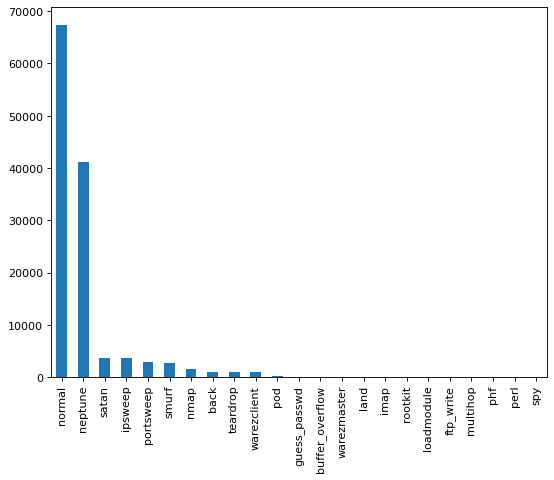

In [ ]:
#visualizing the labels
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
df_train['label'].value_counts().plot(kind='bar') #uneven distribution clearly seen

In [ ]:
df_train.isnull().values.any()


False

In [ ]:
df_test.isnull().values.any()

False

In [ ]:
#one hot encoding of non numeric features
cols = ['protocol_type','service','flag']


In [ ]:
#one hot-encoding
def one_hot_encoding(df,cols):
 for each in cols:
  dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
  df = pd.concat([df, dummies], axis=1)
  df = df.drop(each, 1)
 return df


In [ ]:
#data normalization to control fluctuations between columns
def normalize(df, cols):
    result = df.copy()
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
combined_data = pd.concat([df_train,df_test])
combined_data = one_hot_encoding(combined_data,cols)

<ipython-input-9-cbedf314fc31>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(each, 1)
<ipython-input-9-cbedf314fc31>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(each, 1)
<ipython-input-9-cbedf314fc31>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(each, 1)


In [ ]:
temp = combined_data.pop('label')

In [ ]:
train_df_final = normalize(combined_data,combined_data.columns)

In [ ]:
train_df_final

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0.0,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,0.0,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,0.0,1.0,0.000134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22542,0.0,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#fixing labels for the training data
class_label = []
dos = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
probe = ("ipsweep","mscan","nmap","portsweep","saint","satan")
u2r = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
r2l = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

DoSCount=0
ProbeCount=0
U2RCount=0
R2LCount=0
NormalCount=0

for item in temp:
    if item in dos:
        class_label.append("DOS")
        DoSCount=DoSCount+1
    elif item in probe:
        class_label.append("Probe")
        ProbeCount=ProbeCount+1
    elif item in u2r:
        class_label.append("U2R")
        U2RCount=U2RCount+1
    elif item in r2l:
        class_label.append("R2L")
        R2LCount=R2LCount+1
    else:
        class_label.append("Normal")
        NormalCount=NormalCount+1

In [ ]:
train_df_final["Class"] = class_label

<ipython-input-16-c79604437761>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df_final["Class"] = class_label


In [ ]:
y_train=train_df_final["Class"]


<Axes: >

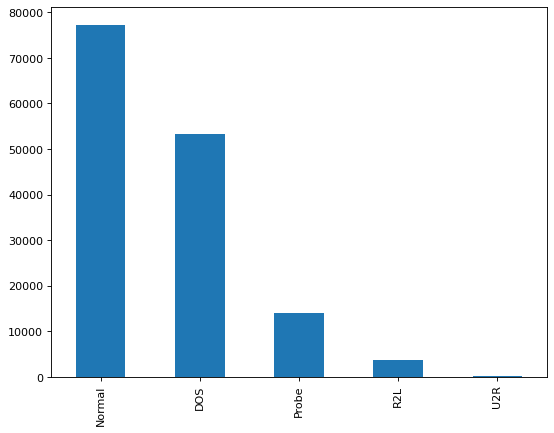

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
train_df_final['Class'].value_counts().plot(kind='bar') #uneven distribution clearly seen

In [ ]:
X_train = train_df_final.drop('Class', 1)


<ipython-input-19-19f9cd3f1c89>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = train_df_final.drop('Class', 1)


**Testing various machine learning algorithms**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
def plot_cm(Y_test , pred):
 cm = confusion_matrix(Y_test, pred)
 %matplotlib inline
 import matplotlib.pyplot as plt
 import seaborn as sn
 plt.figure(figsize=(7,5))
 sn.heatmap(cm, annot=True)
 plt.xlabel('Predicted')
 plt.ylabel('Truth')

Logistic Regresion:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter = 500)
lr.fit(x_train, Y_train)

LogisticRegression(max_iter=500)

In [ ]:
lr.score(x_test, Y_test)


0.9647858874225693

In [ ]:
pred_lr= lr.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


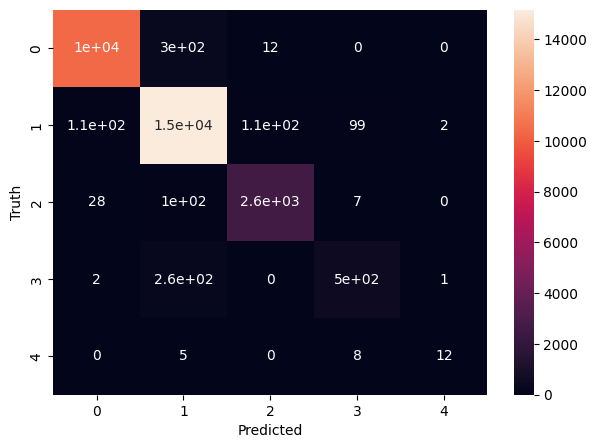

In [ ]:
plot_cm(Y_test , pred_lr)

In [ ]:
classification_report(Y_test , pred_lr)

'              precision    recall  f1-score   support\n\n         DOS       0.99      0.97      0.98     10688\n      Normal       0.96      0.98      0.97     15486\n       Probe       0.96      0.95      0.95      2749\n         R2L       0.81      0.66      0.73       756\n         U2R       0.80      0.48      0.60        25\n\n    accuracy                           0.96     29704\n   macro avg       0.90      0.81      0.85     29704\nweighted avg       0.96      0.96      0.96     29704\n'

Although accuracy is high due to an highly unbalanced dataset we can see that the performance onsome of the minority classes is quite poor

KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,Y_train)


KNeighborsClassifier()

In [ ]:
knn.score(x_test,Y_test)

0.99037166711554

In [ ]:
pred_knn=knn.predict(x_test)

In [ ]:
plot_cm(Y_test , pred_knn)

NameError: ignored

Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, Y_train)


In [ ]:
clf.score(x_test, Y_test)

0.9946471855642338

In [ ]:
pred_clf= clf.predict(x_test)

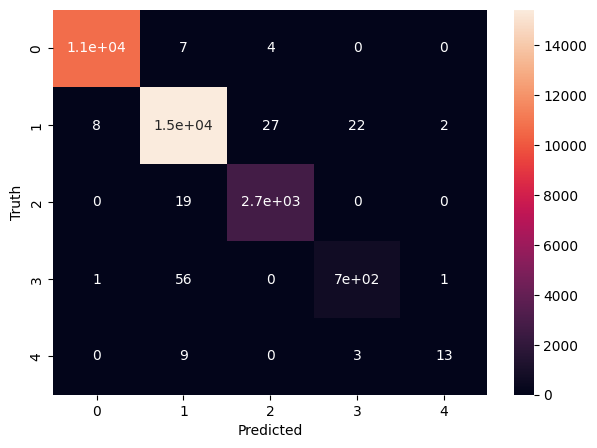

In [ ]:
plot_cm(Y_test , pred_clf)

The above gave an improved accuracy as well far better performance on minority classes.

SVM:

In [ ]:
from sklearn import svm
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
rbf.fit(x_train, Y_train)


SVC(C=0.1, gamma=0.5)

In [ ]:
rbf.score(x_test, Y_test)

0.9738082413143011

In [ ]:
pred_rbf= rbf.predict(x_test)

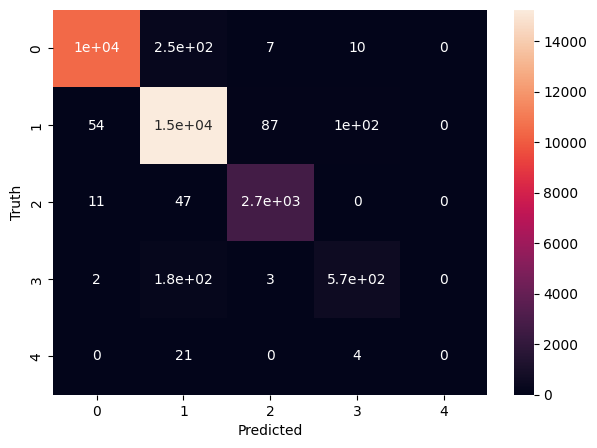

In [ ]:
plot_cm(Y_test , pred_rbf)

The above gave very bad performance on minority classes.

We found machine learning algorithms to be insufficient and thought of experimenting with an lstm + cnn based approach in order to improve the overall performance of our model.

**Deep Learning**

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits= 3,shuffle=True,random_state=42)
kfold.get_n_splits(X_train,y_train)

3

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D,ZeroPadding1D
import numpy as np
from keras.layers import Input, LSTM, Dense, concatenate, Bidirectional, BatchNormalization , Reshape
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error
                             ,mean_absolute_error)
from sklearn import metrics

In [ ]:
#creating model
model = Sequential()
model.add(Convolution1D(64, kernel_size=122, activation="relu", input_shape=(122, 1)))
model.add(ZeroPadding1D(padding=2))
model.add(MaxPooling1D(pool_size=5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Adjust return_sequences if needed
model.add(ZeroPadding1D(padding=2))
model.add(MaxPooling1D(pool_size=5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=False)))

model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



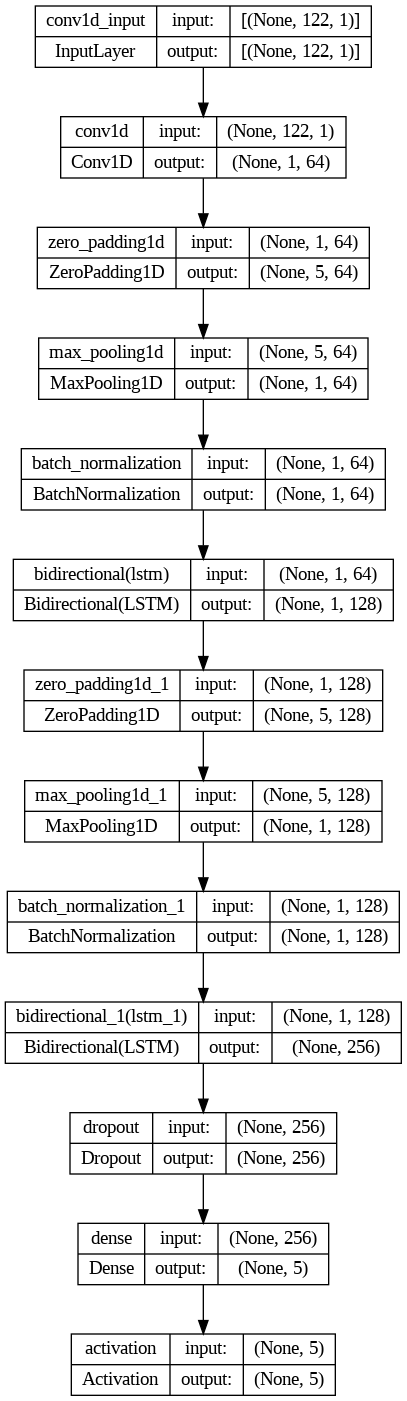

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
oos_pred = []
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek


In [ ]:
for train_index, test_index in kfold.split(X_train,y_train):
    X_train1, test_X =X_train.iloc[train_index], X_train.iloc[test_index]
    y_train1, test_y = y_train.iloc[train_index], y_train.iloc[test_index]

    #smote_tomek = SMOTETomek(random_state=42)
    #X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

    tomek_links = TomekLinks() #For undersampling of majority class
    train_X, train_y = tomek_links.fit_resample(X_train1, y_train1)
    print("train index:",train_index)
    print("test index:",test_index)

    x_columns_train = train_df_final.columns.drop('Class')
    x_train_array = train_X[x_columns_train].values
    x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))

    dummies = pd.get_dummies(train_y) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = dummies.values

    x_columns_test = train_df_final.columns.drop('Class')
    x_test_array = test_X[x_columns_test].values
    x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))

    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = dummies_test.values

    model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=10)

    pred = model.predict(x_test_2)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    oos_pred.append(score)
    print("Validation score: {}".format(score))

train index: [     0      2      3 ... 148512 148514 148516]
test index: [     1      7     12 ... 148511 148513 148515]
Epoch 1/10
3088/3088 [==============================] - 66s 18ms/step - loss: 0.0949 - accuracy: 0.9683 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 2/10
3088/3088 [==============================] - 49s 16ms/step - loss: 0.0552 - accuracy: 0.9804 - val_loss: 0.0630 - val_accuracy: 0.9788
Epoch 3/10
3088/3088 [==============================] - 48s 16ms/step - loss: 0.0475 - accuracy: 0.9832 - val_loss: 0.0464 - val_accuracy: 0.9859
Epoch 4/10
3088/3088 [==============================] - 54s 17ms/step - loss: 0.0430 - accuracy: 0.9849 - val_loss: 0.3749 - val_accuracy: 0.8609
Epoch 5/10
3088/3088 [==============================] - 52s 17ms/step - loss: 0.0390 - accuracy: 0.9859 - val_loss: 0.0550 - val_accuracy: 0.9828
Epoch 6/10
3088/3088 [==============================] - 48s 15ms/step - loss: 0.0364 - accuracy: 0.9870 - val_loss: 0.0402 - val_accuracy: 0.9866
Epo

In [ ]:
y_test_2

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

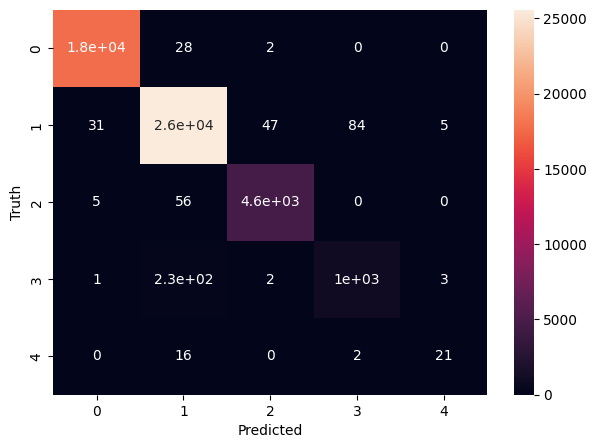

In [ ]:
from sklearn.metrics import confusion_matrix
confussion_matrix=confusion_matrix(y_eval, pred, labels=[0,1,2,3,4])
plot_cm(y_eval , pred)